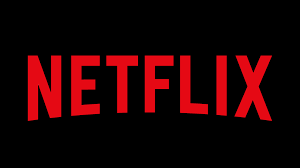

## Plataforma Netflix

### Objetivo

O objetivo deste projeto, é contruir um Sistema de Recomendação de outros programas/filmes, à partir da construção de um Modelo de Machine Learning.

### Sobre os dados

Este é o conjunto de dados de filmes na Netflix, que inclui título, ano, duração, gênero , avaliações, descrições e votação, esse conjunto de dados ajudará muitos sites ou provedores de filmes a fornecer o melhor conteúdo e recomendação de filmes, e isso também será útil para muitos fins de pesquisa. Existem 9.957 entradas e 9 colunas e uma tabela básica. A Netflix é uma das plataformas de streaming de mídia mais populares. Esses dados podem ajudar as pessoas a encontrar os filmes de seu desejo.

Esses dados foram disponibilzados pelo site da Kaggle: https://www.kaggle.com/datasets

### Conhecendo os dados

Importando as bibliotecas para as primeiras análises

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('n_movies.csv')
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [3]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [4]:
df.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes           object
dtype: object

In [5]:
df['rating'] = df['rating'].astype(str)
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [6]:
df.dtypes

title          object
year           object
certificate    object
duration       object
genre          object
rating         object
description    object
stars          object
votes          object
dtype: object

In [7]:
print(df.isnull().sum())
print('-'*20)
df.isna().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating            0
description       0
stars             0
votes          1173
dtype: int64
--------------------


title             0
year            527
certificate    3453
duration       2036
genre            73
rating            0
description       0
stars             0
votes          1173
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


## ***Desenvolvendo o Sistema de Recomendação***

### Análise Exploratória

Importando as bibliotecas

In [10]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random

In [11]:
import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

In [12]:
def avaliacao(index):
    example = df[df.index == index][['rating', 'title', 'genre', 'description']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Filme: ', example[1])
        print('Gênero: ', example[2])
        print('Descrição: ', example[3])

In [13]:
avaliacao(9)

6.2
Filme:  Blonde
Gênero:  Biography, Drama, Mystery
Descrição:  A fictionalized chronicle of the inner life of Marilyn Monroe.


In [14]:
avaliacao(4)

8.6
Filme:  Cyberpunk: Edgerunners
Gênero:  Animation, Action, Adventure
Descrição:  A Street Kid trying to survive in a technology and body modification-obsessed city of the future. Having everything to lose, he chooses to stay alive by becoming an Edgerunner, a Mercenary outlaw also known as a Cyberpunk.


### Visualize a distribuição de frequência do token (vocabulário) antes a remoção das Stop Words

In [15]:
%matplotlib inline
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['description'], 20)
df1 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df1.groupby('description').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Descrição dos Filmes')

### Visualize a distribuição de frequência do token (vocabulário) após a remoção das Stop Words

In [16]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['description'], 20)
df2 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df2.groupby('description').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Descrição dos Filmes')

### Bigrams (2 termos) Distribuição de frequência antes de remover Stop Word

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['description'], 20)
df3 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df3.groupby('description').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title=
                                                                                        'Descrição dos Filmes')

### Bigrams - Distribuição de frequência depois de remover Stop Word

In [18]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['description'], 20)
df4 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df4.groupby('description').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title=
                                                                                        'Descrição dos Filmes')

### Trigrams - Distribuição de frequência antes de remover Stop Word

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['description'], 20)
df3 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df3.groupby('description').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title=
                                                                                        'Descrição dos Filmes')

### Trigrams - Distribuição de frequência depois de remover Stop Word

In [20]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['description'], 20)
df4 = pd.DataFrame(common_words, columns = ['description' , 'count'])
df4.groupby('description').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title=
                                                                                        'Descrição dos Filmes')

### Pre-processing dos Dados

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: o text é uma string
        
        return: o output será a versão limpa
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['description_clean'] = df['description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RGama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def description(index):
    example = df[df.index == index][['description_clean', 'title']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Filme:', example[1])
description(3)

psychiatrist shelters mysterious cult escapee world turned upside girls arrival threatens tear family apart
Filme: Devil in Ohio


In [23]:
def description(index):
    example = df[df.index == index][['description_clean', 'title']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Filme:', example[1])
description(0)

decades 1984 valley karate tournament bout middleaged daniel larusso johnny lawrence find martialarts rivals
Filme: Cobra Kai


In [24]:
df.set_index('title', inplace = True)

In [25]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
indices = pd.Series(df.index)

In [27]:
indices[:50]

0                                             Cobra Kai
1                                             The Crown
2                                      Better Call Saul
3                                         Devil in Ohio
4                                Cyberpunk: Edgerunners
5                                           The Sandman
6                                        Rick and Morty
7                                          Breaking Bad
8                                        The Imperfects
9                                                Blonde
10                                      Stranger Things
11                                      End of the Road
12                                     The Walking Dead
13                    Glass Onion: A Knives Out Mystery
14                                           Do Revenge
15                                            I Came By
16                                             No Limit
17                                              





### Máquina Preditiva com Machine Learning

In [28]:
def recommendations(title, cosine_similarities = cosine_similarities):
    
    recommended_film = []
    
    # obtendo o índice do hotel que corresponde ao nome
    idx = indices[indices == title].index[0]

    # criando uma série com as pontuações de similaridade em ordem decrescente
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # obtendo os índices dos 10 hotéis mais semelhantes, exceto ele próprio
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # preencher a lista com os nomes dos 10 principais hotéis correspondentes
    for i in top_10_indexes:
        recommended_film.append(list(df.index)[i])
        
    return recommended_film

In [29]:
recommendations('Modern Family')

['Modern Family',
 'A Series of Unfortunate Events',
 'Doc Martin',
 'Better Call Saul',
 'I Am Not Okay with This',
 'The Fate of the Furious',
 'ThirTEEN Terrors',
 'Best. Worst. Weekend. Ever.',
 'Flavors of Youth',
 'Dating Around: Brazil']